In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [4]:
# Basic checks of the dataset

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [6]:
data.shape

(7043, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# no null value exists

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [11]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
#droping customer ID since it had all unique value
data = data.drop(columns = 'customerID', axis =1)

In [13]:
for i in data.columns:
    print(f"{i} = {data[i].unique()} \n {data[i].value_counts()}\n\n")

gender = ['Female' 'Male'] 
 Male      3555
Female    3488
Name: gender, dtype: int64


SeniorCitizen = [0 1] 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Partner = ['Yes' 'No'] 
 No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents = ['No' 'Yes'] 
 No     4933
Yes    2110
Name: Dependents, dtype: int64


tenure = [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


PhoneService = ['No' 'Yes'] 
 Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines = ['No phone service' 'No' 'Yes'] 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService = ['DSL' 'Fiber 

In [14]:
data.loc[data['InternetService'] == 'No'].shape

(1526, 20)

In [15]:
data.loc[data['InternetService'] == 'No']['Churn'].value_counts()

No     1413
Yes     113
Name: Churn, dtype: int64

In [16]:
# 1526 rows which does not have internet have same pattern. BUt there is mized result in terms of churn.
# so we can treat these along with the other data sets.

In [17]:
data.shape

(7043, 20)

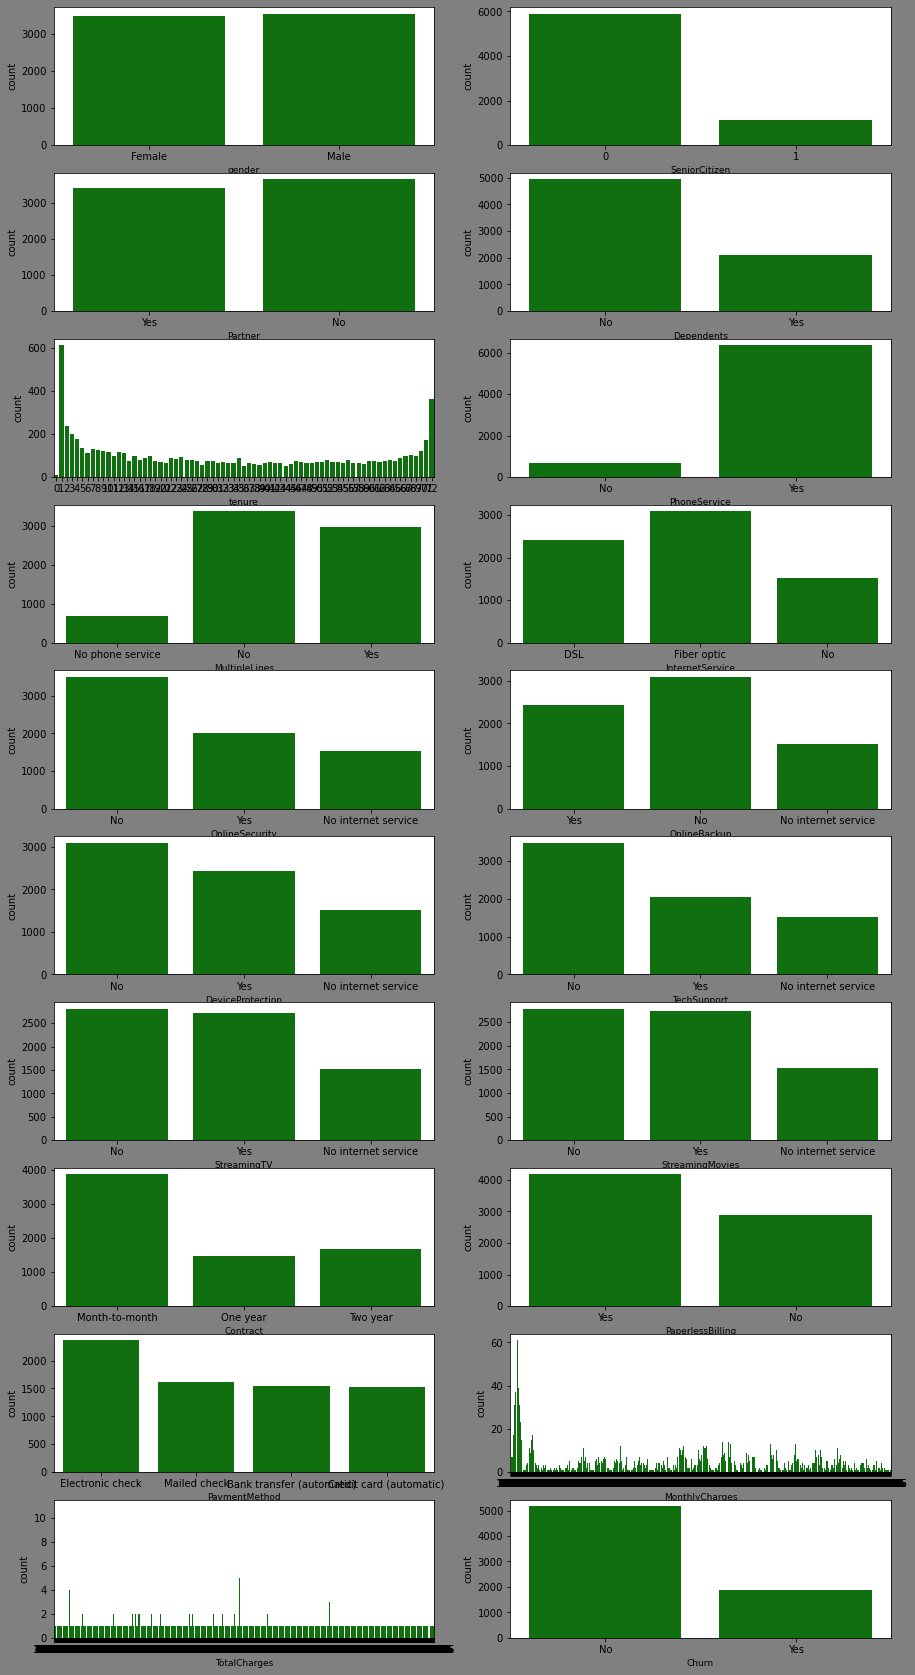

In [20]:
plt.figure(figsize=(15,30),facecolor='grey')
plotnumber = 1


for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.countplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

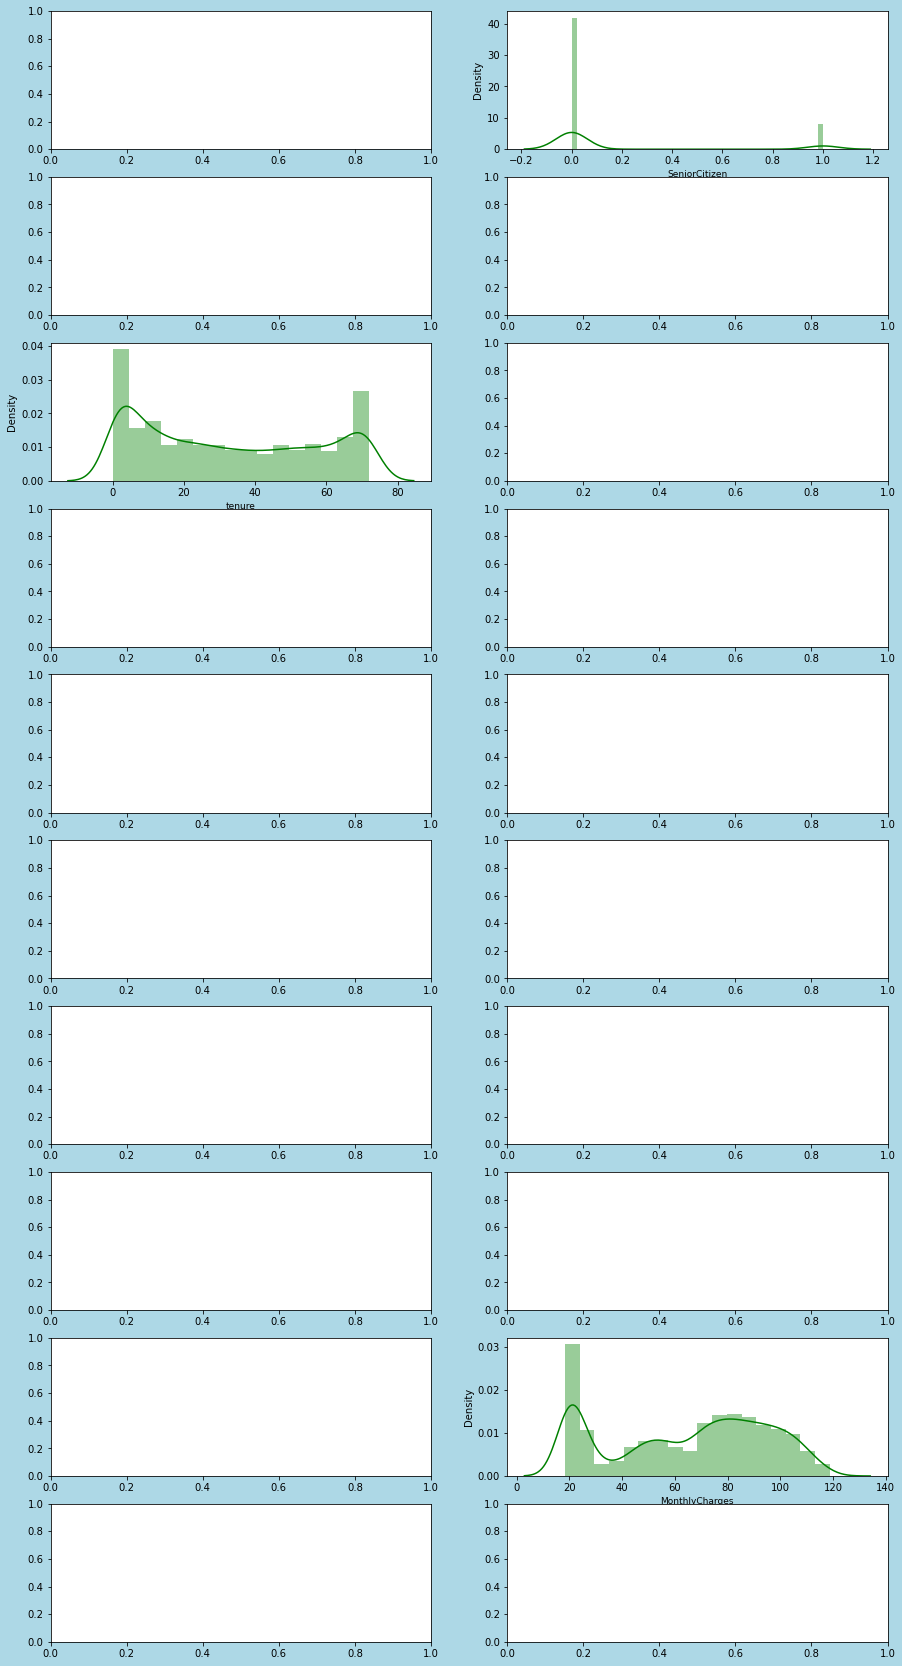

In [24]:
# consider only continuous data
plt.figure(figsize=(15,30),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        if(data[column].dtypes != 'object'):
            sns.distplot(data[column],color = 'green')
            plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [29]:
#Bivariate

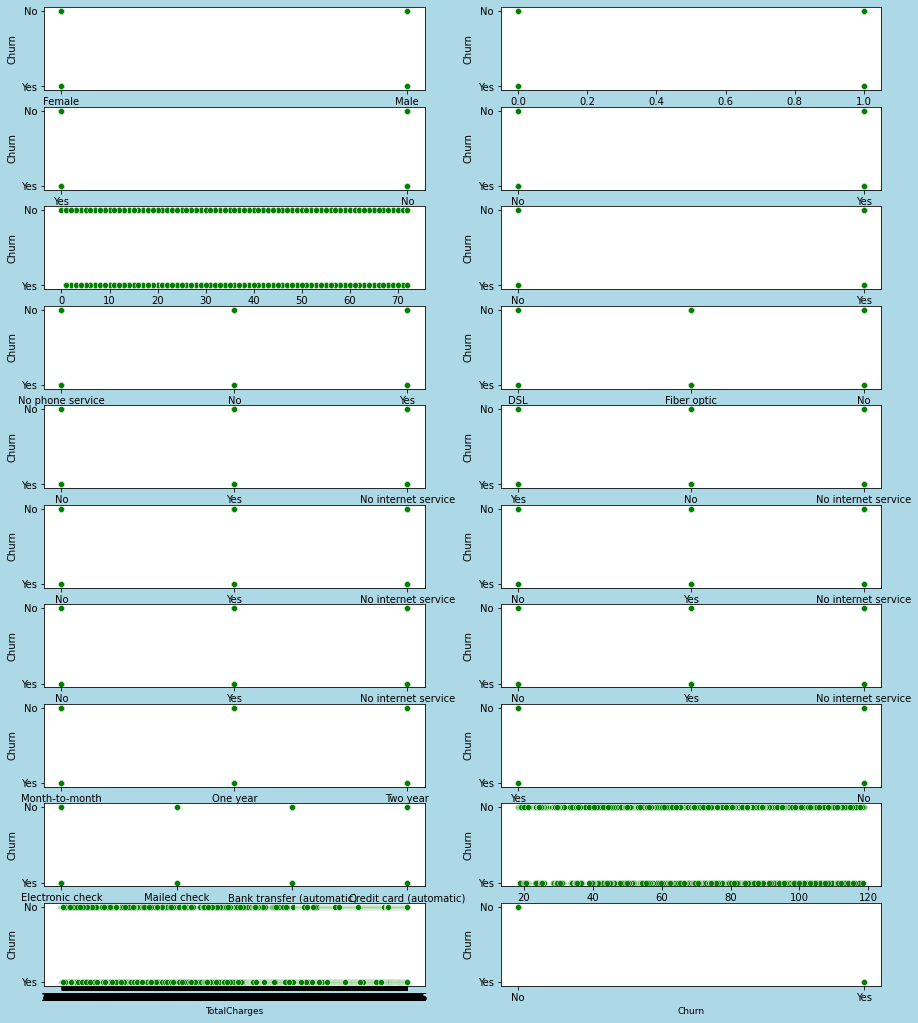

In [30]:
plt.figure(figsize=(15,18),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.scatterplot(data[column],data['Churn'],color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

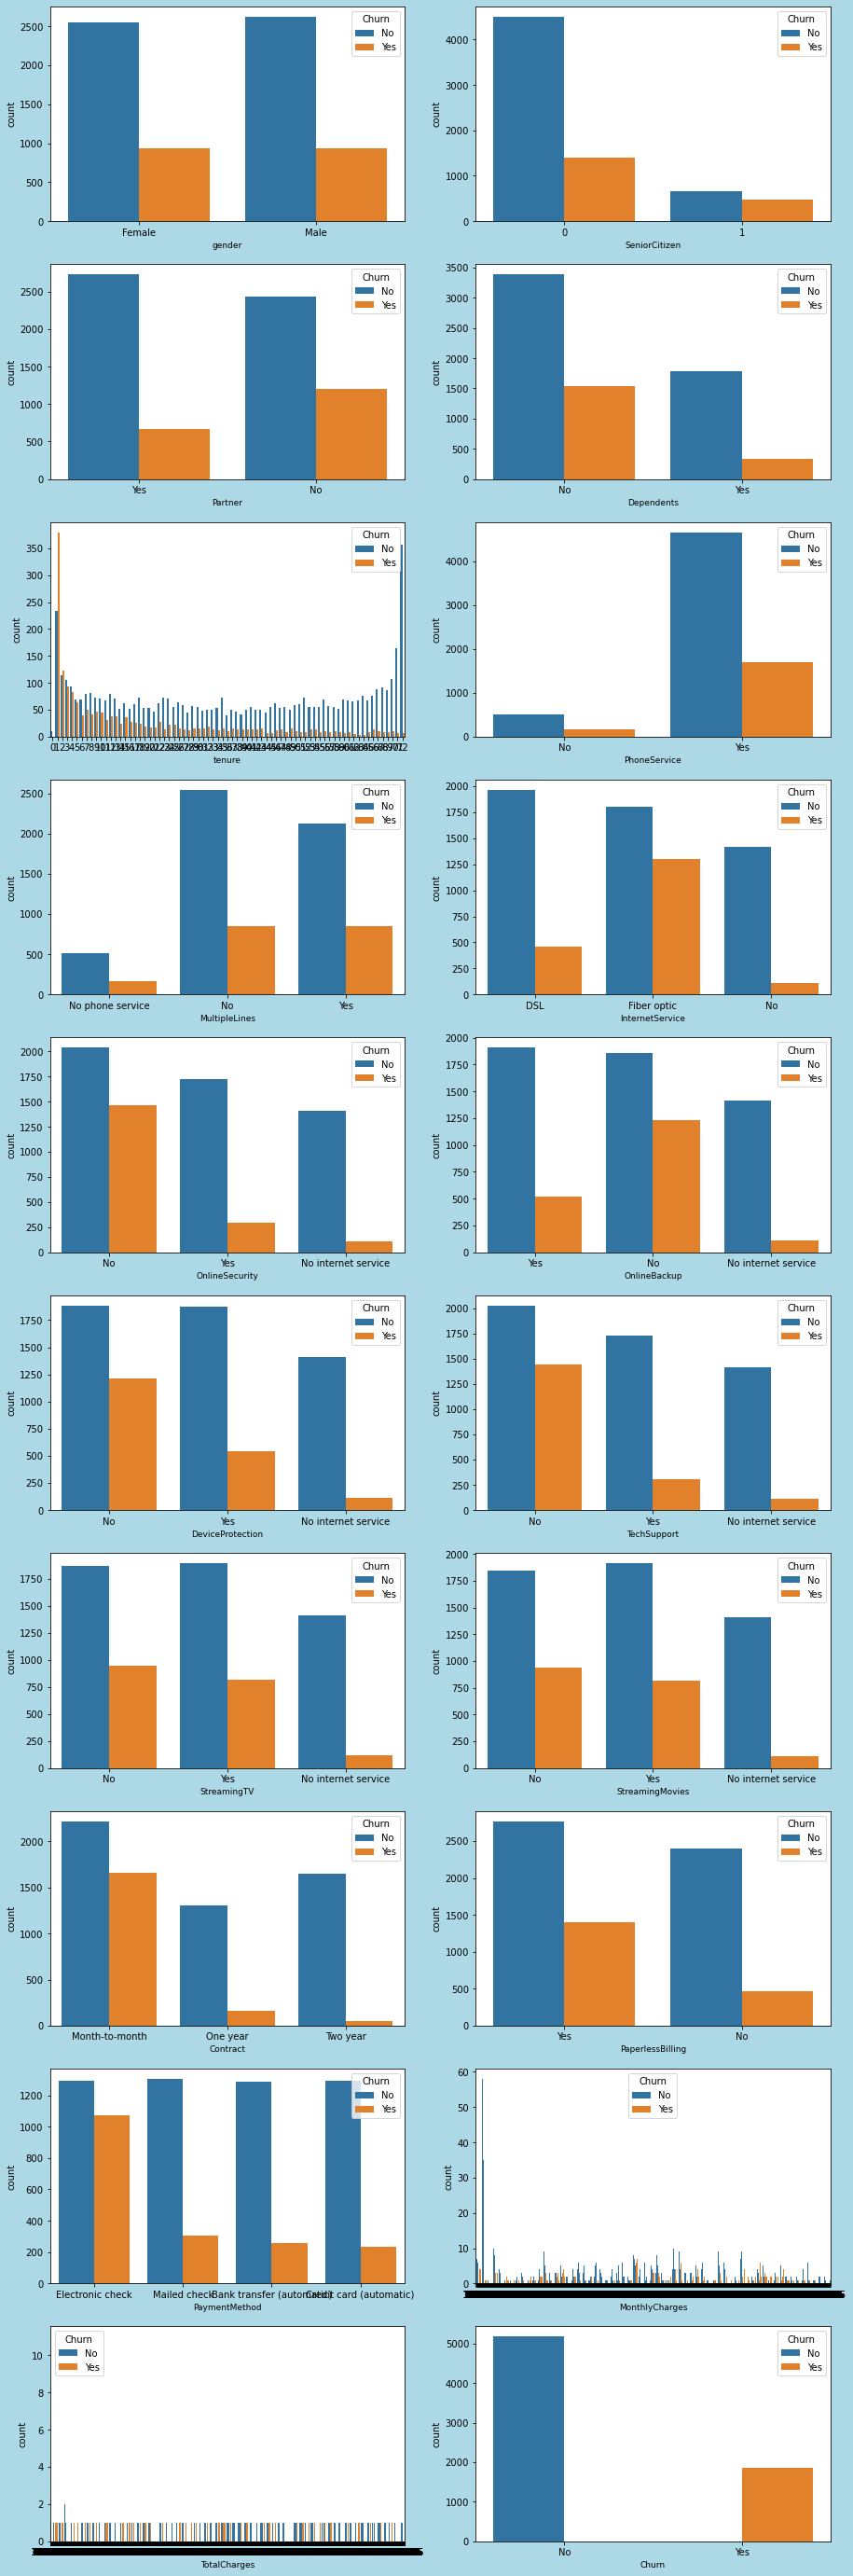

In [32]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.countplot(data[column],hue = data['Churn'])
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [34]:
# encoding categorical variables

In [35]:
from sklearn.preprocessing import OrdinalEncoder
for i in data.columns:
    if data[i].dtypes == 'object':
        enco = OrdinalEncoder(categories=[data[i].unique()])
        data[i] = enco.fit_transform(data[[i]])

In [36]:
for i in data.columns:
    print(f"{i} = {data[i].unique()} \n {data[i].value_counts()}\n\n")

gender = [0. 1.] 
 1.0    3555
0.0    3488
Name: gender, dtype: int64


SeniorCitizen = [0 1] 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Partner = [0. 1.] 
 1.0    3641
0.0    3402
Name: Partner, dtype: int64


Dependents = [0. 1.] 
 0.0    4933
1.0    2110
Name: Dependents, dtype: int64


tenure = [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


PhoneService = [0. 1.] 
 1.0    6361
0.0     682
Name: PhoneService, dtype: int64


MultipleLines = [0. 1. 2.] 
 1.0    3390
2.0    2971
0.0     682
Name: MultipleLines, dtype: int64


InternetService = [0. 1. 2.] 
 1.0    3096
0.0    2421
2.0    1526
Name: InternetService, dtype: int64


OnlineSecurity = [

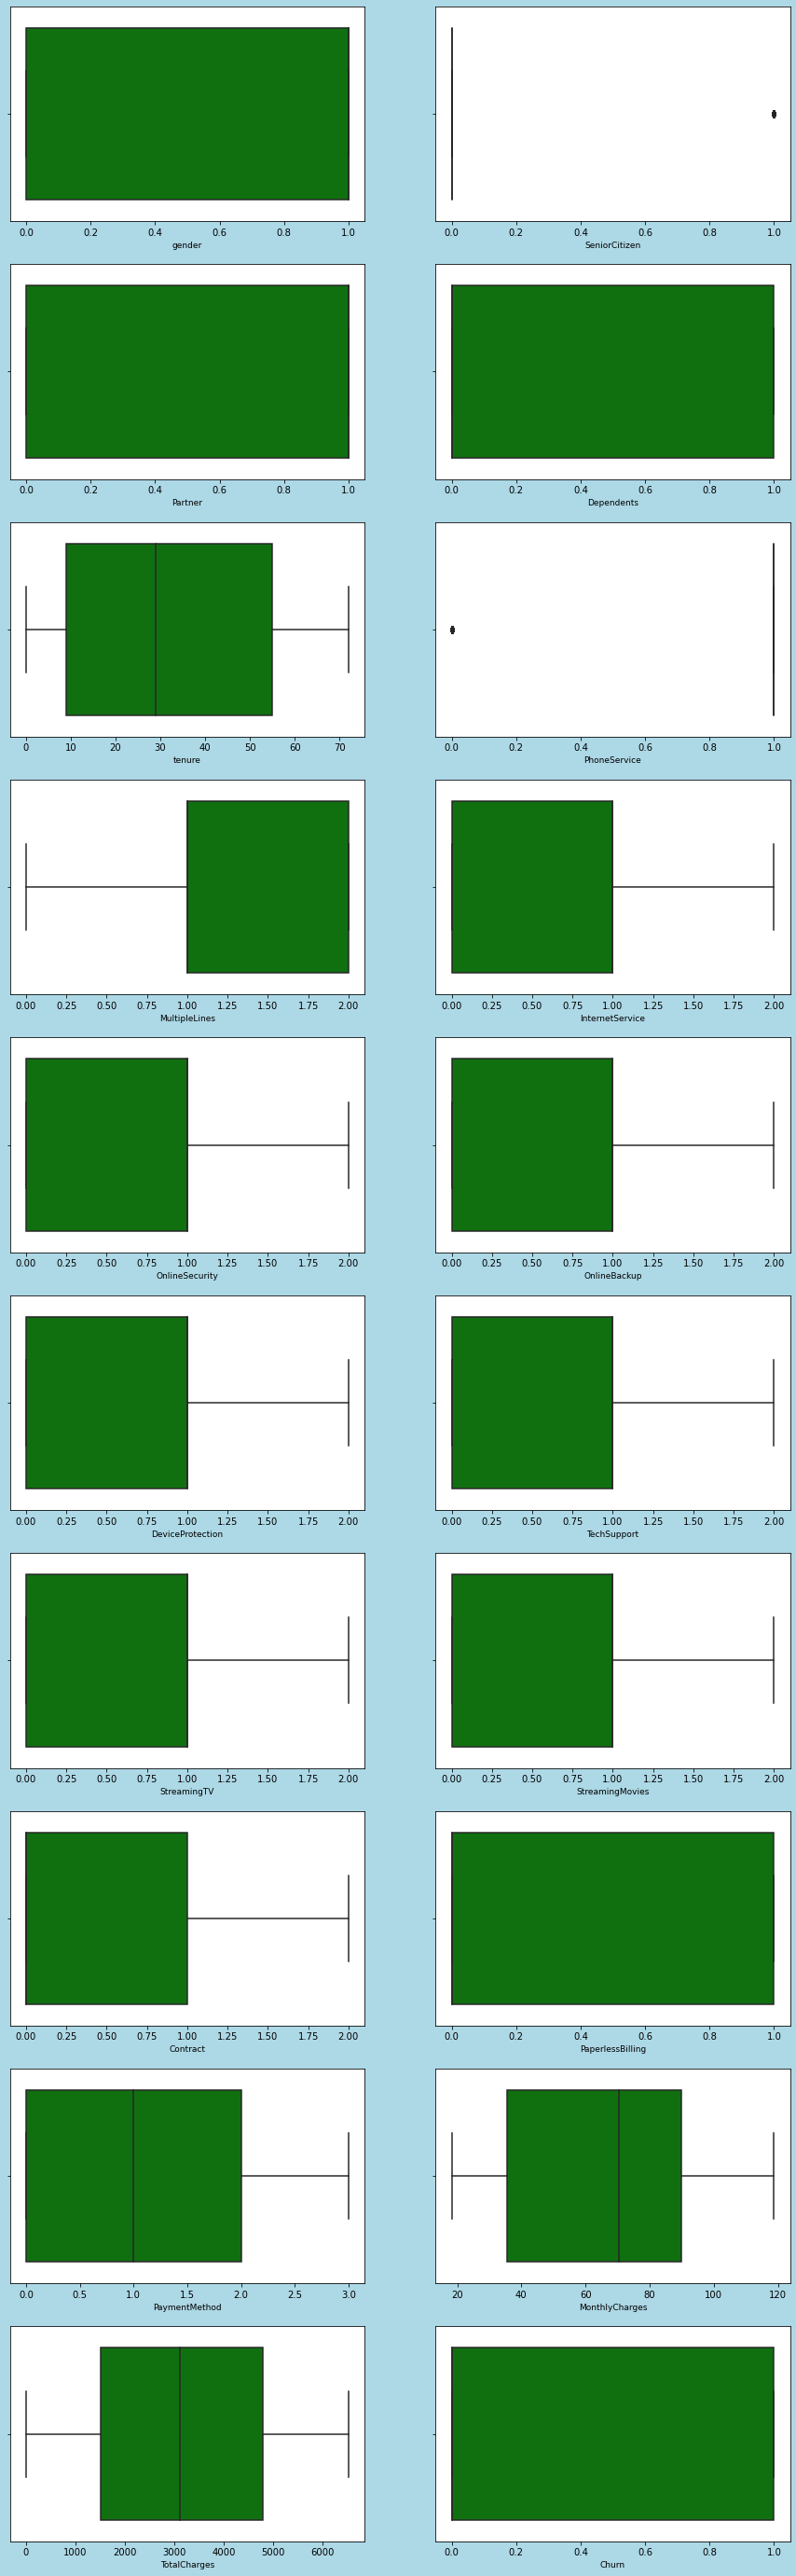

In [37]:
plt.figure(figsize=(15,50),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.boxplot(data[column], color = 'green')
        plt.xlabel(column,fontsize=9)
        
    plotnumber+=1
plt.show()

In [38]:
#NO need to treat the outliers

## Feature Selection

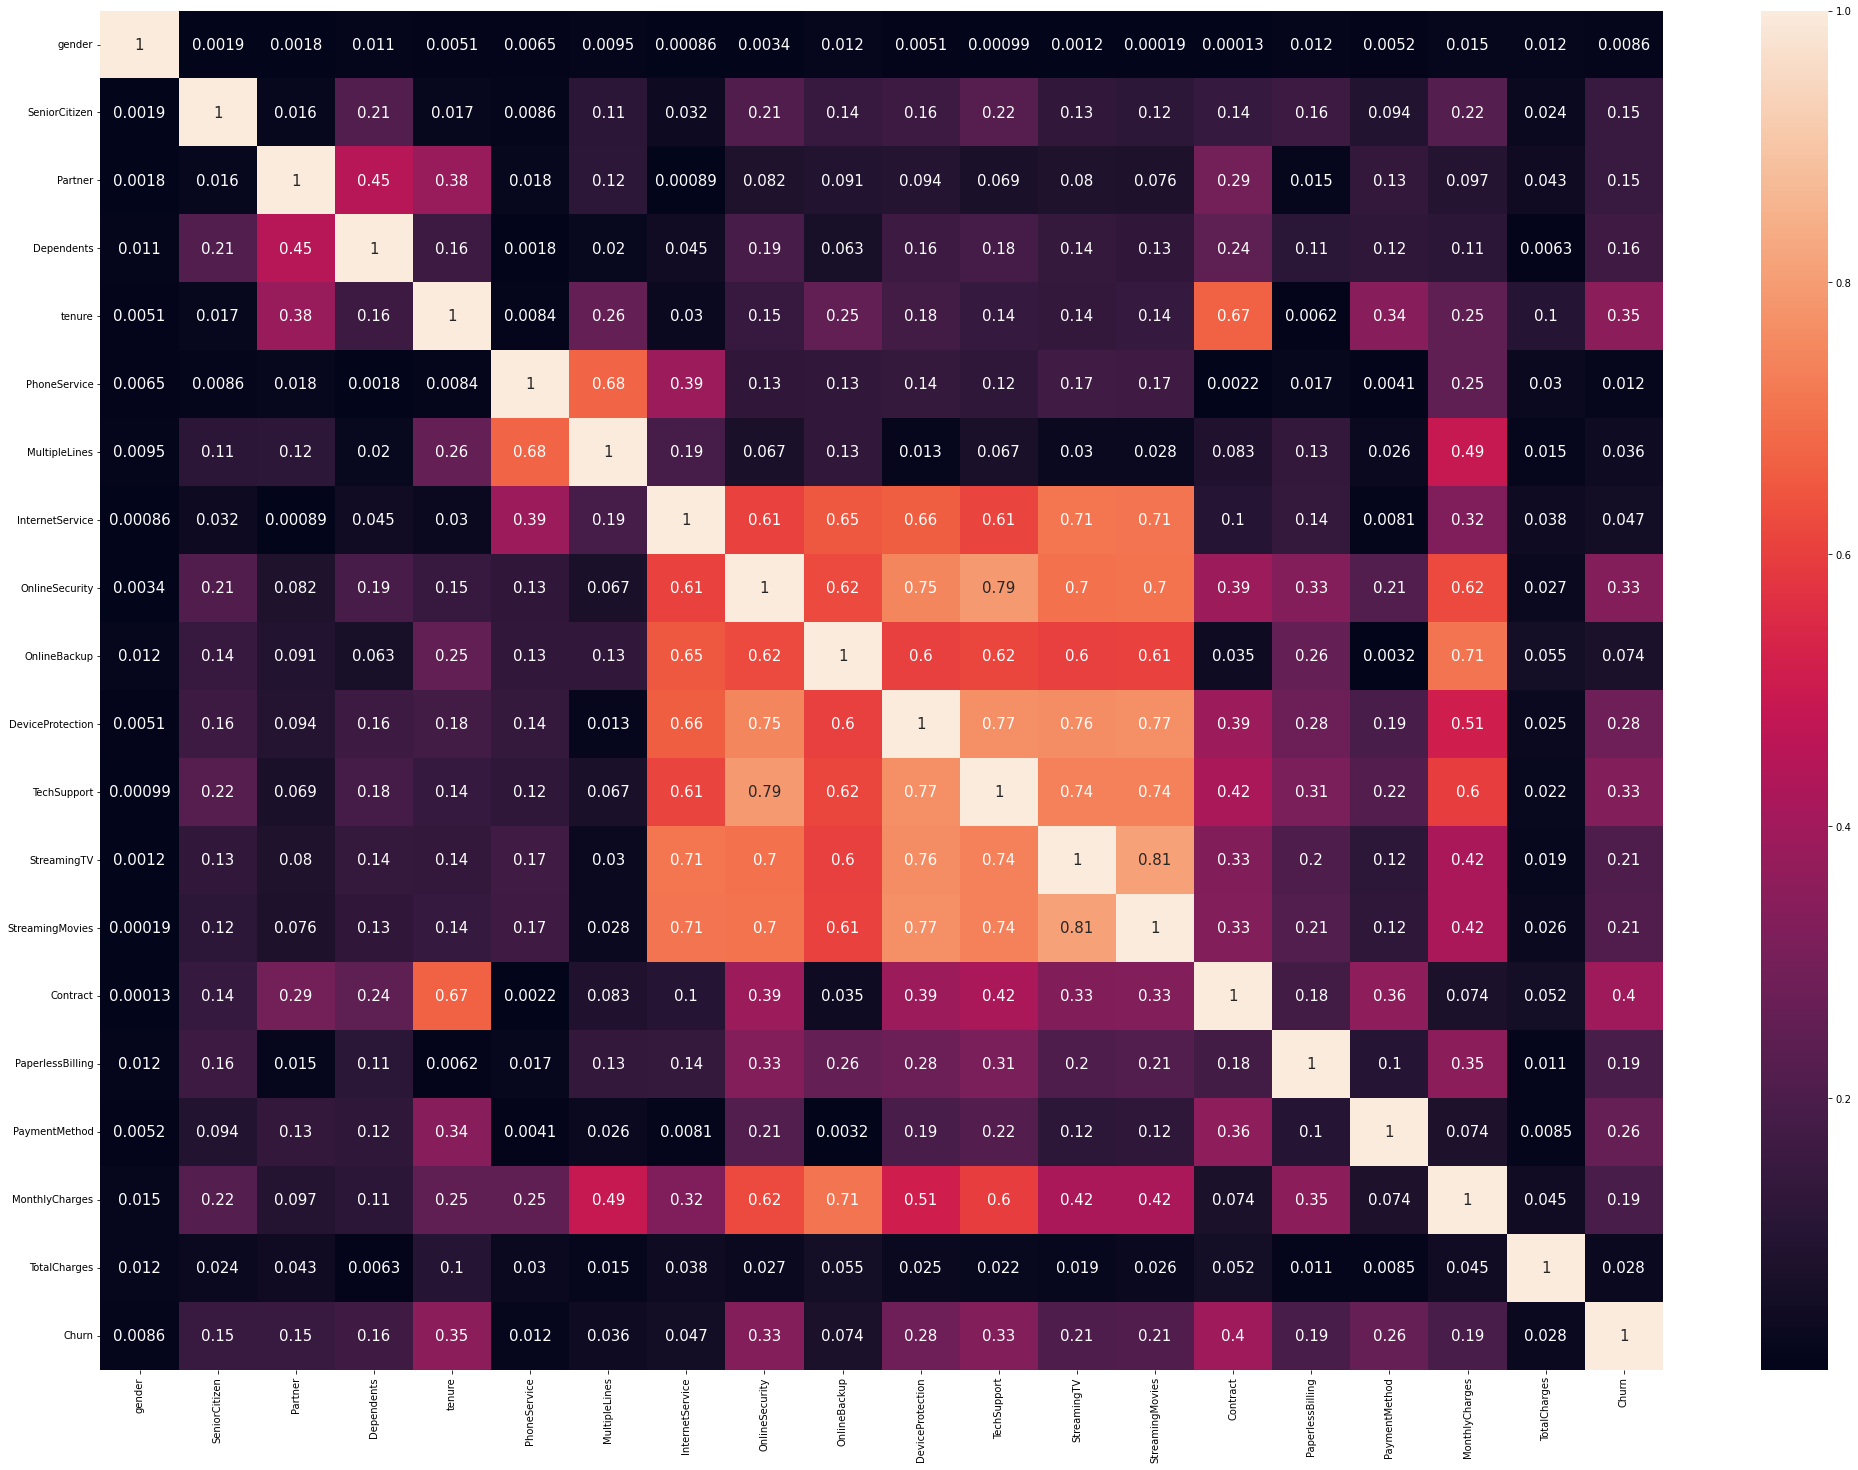

In [40]:
df_corr = data.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

<AxesSubplot:>

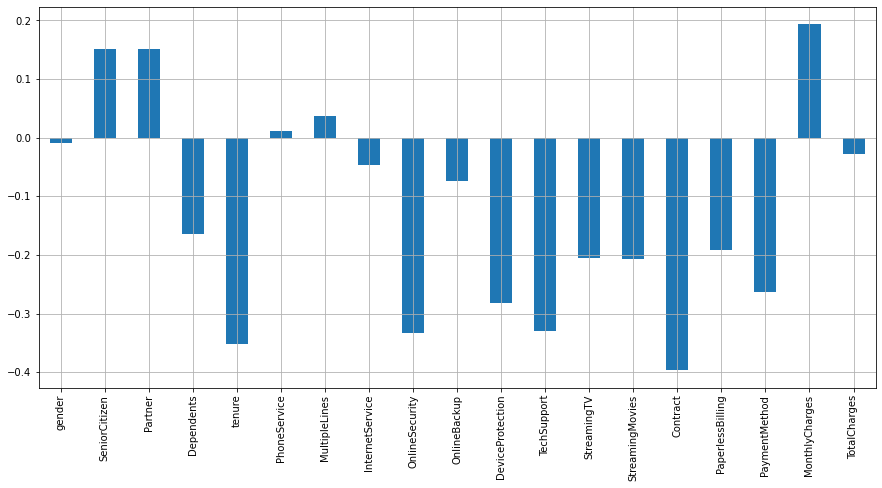

In [41]:
data.drop('Churn',axis =1).corrwith(data.Churn).plot(kind = 'bar', grid=True, figsize = (15,7))

In [42]:
#From the above two charts , dropping the corelated and less impact features
# dropping StreamingTV, device protection,gender, PhoneServices and TotalCharges

In [43]:
data = data.drop(columns =['StreamingTV', 'DeviceProtection', 'gender', 'PhoneService', 'TotalCharges'], axis =1)

In [44]:
data.shape

(7043, 15)

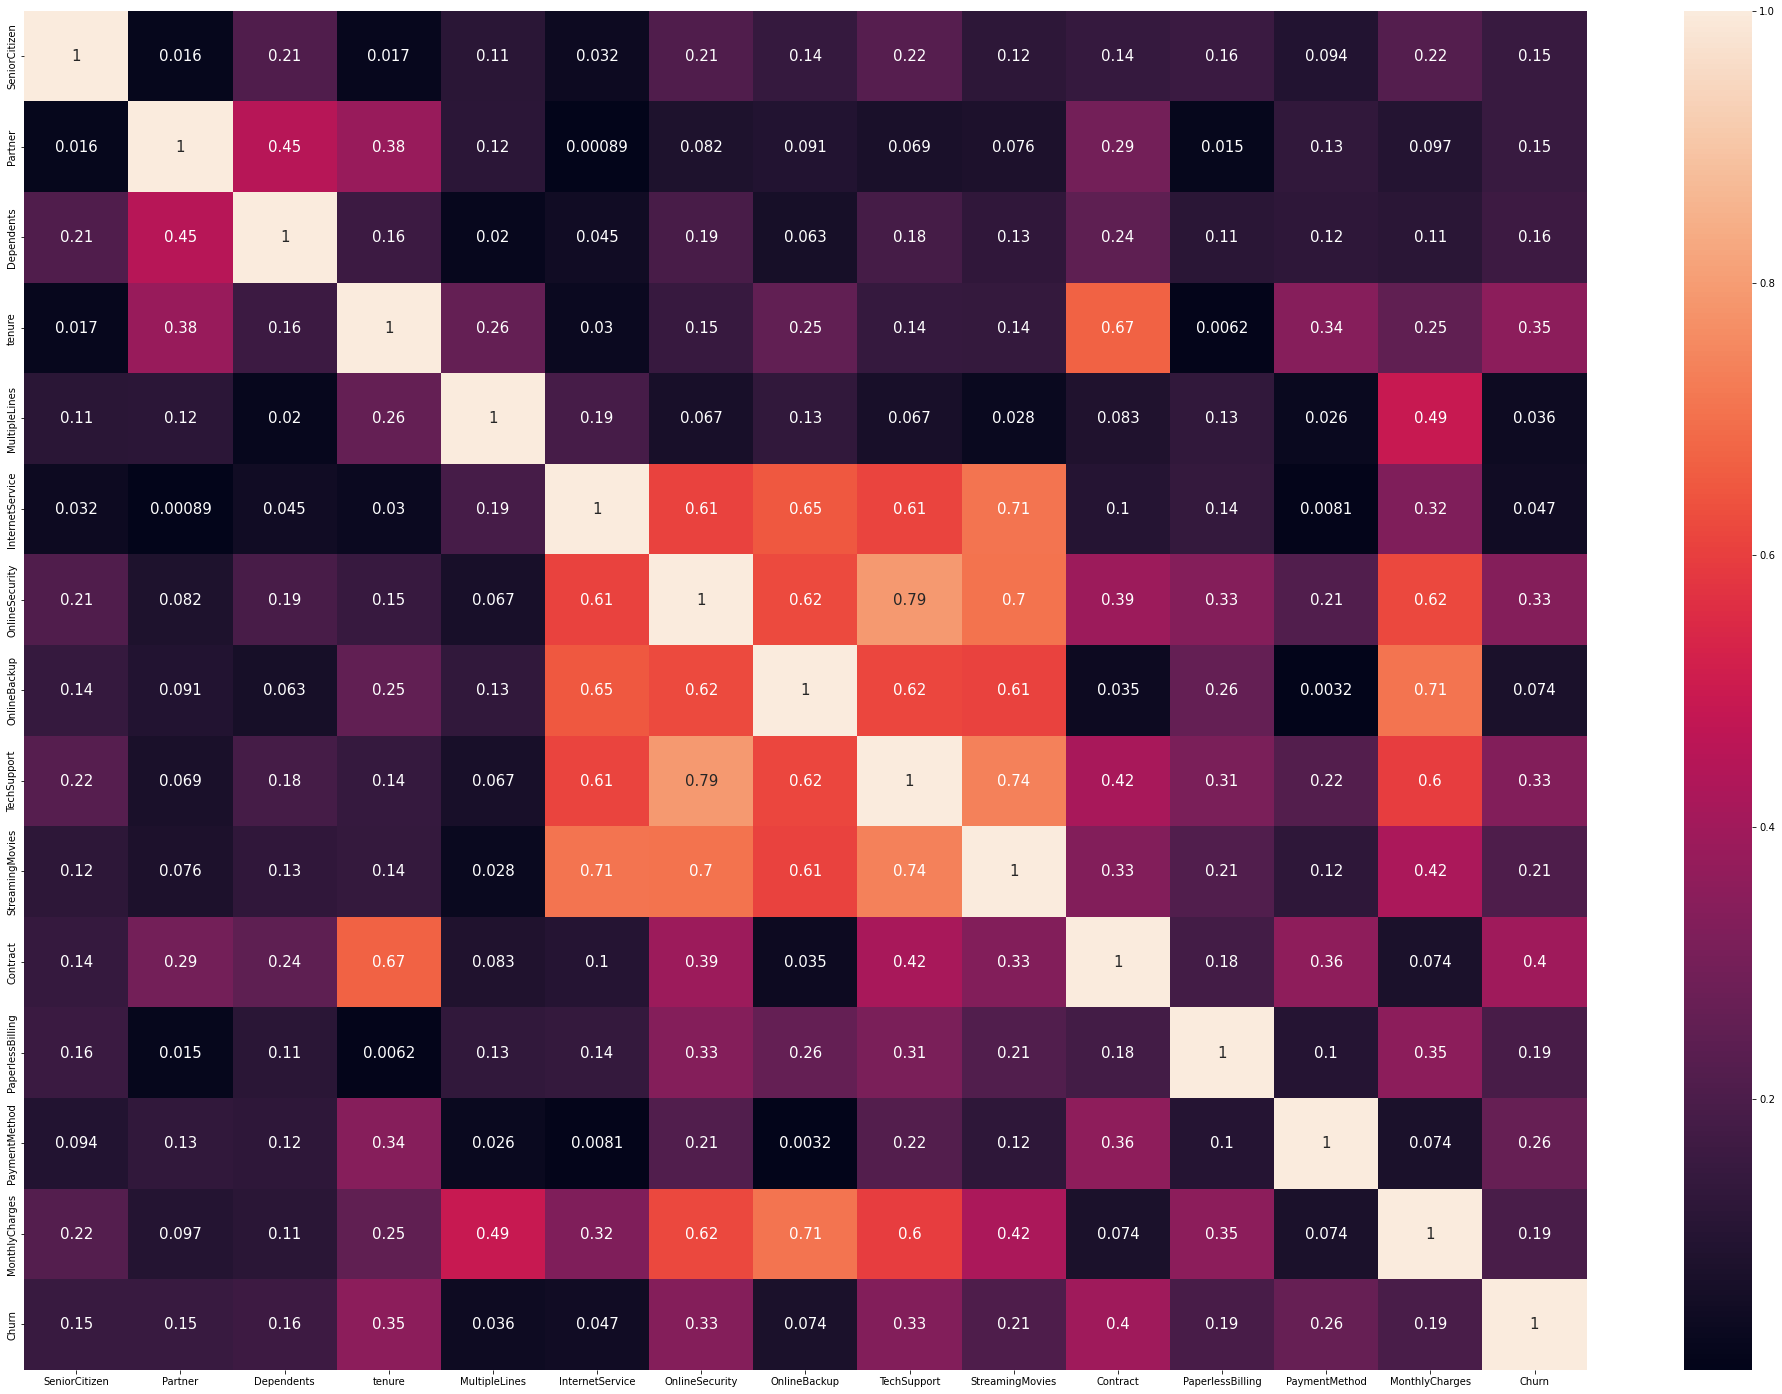

In [45]:
df_corr = data.corr().abs()

plt.figure(figsize =(35, 25))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :15})
plt.show()

In [47]:
# now, no feature not corelated more than 75%

In [48]:
data['Churn'].value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [49]:
# Need to balance the data set

In [52]:
x = data.drop(columns = ['Churn'],axis =1)
y = data.Churn

In [53]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [54]:
balanced_x,balanced_y = smt.fit_resample(x, y)

In [55]:
balanced_x.shape, balanced_y.shape

((10348, 14), (10348,))

In [56]:
# Dataset has been balanced now

In [57]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
balanced_x_scaled = scale.fit_transform(balanced_x)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(balanced_x_scaled,i) for i in range(balanced_x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.096813,SeniorCitizen
1,1.489134,Partner
2,1.387510,Dependents
3,2.699097,tenure
4,1.831149,MultipleLines
5,2.865789,InternetService
6,3.869459,OnlineSecurity
7,3.320020,OnlineBackup
8,3.935084,TechSupport
9,2.871039,StreamingMovies


In [59]:
# all values are less than 5. SO there is no multicollinearity exists

## selection of Random state

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LogisticRegression

In [61]:
lg = LogisticRegression()

In [62]:
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(balanced_x_scaled,balanced_y,train_size = 0.75,random_state = i)
    lg.fit(x_train, y_train)
    predict_train = lg.predict(x_train)
    predict_test = lg.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{accuracy_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{accuracy_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {0.766267233603917}
At random state 0, the test set accuracy is  {0.766524932354078}
At random state 1, the train set accuracy is  {0.7656229867285144}
At random state 1, the test set accuracy is  {0.758020873598763}
At random state 2, the train set accuracy is  {0.7667826311042392}
At random state 2, the test set accuracy is  {0.7676845767298028}
At random state 3, the train set accuracy is  {0.7663960829789975}
At random state 3, the test set accuracy is  {0.7607267104754541}
At random state 4, the train set accuracy is  {0.7663960829789975}
At random state 4, the test set accuracy is  {0.7661383842288365}
At random state 5, the train set accuracy is  {0.768457672980286}
At random state 5, the test set accuracy is  {0.7564746810977967}
At random state 6, the train set accuracy is  {0.764076794227548}
At random state 6, the test set accuracy is  {0.7642056436026285}
At random state 7, the train set accuracy is  {0.7698750161061719}
At rand

In [63]:
# at random state 55, the model perfroms well.So random state is 55
x_train,x_test,y_train,y_test = train_test_split(balanced_x,balanced_y,train_size = 0.75,random_state = 55)
lg.fit(x_train, y_train)
predict_train = lg.predict(x_train)
predict_test = lg.predict(x_test)
print(f"The train set accuracy is ",{accuracy_score(y_train,predict_train)})
print(f"The test set accuracy is ",{accuracy_score(y_test,predict_test)})

The train set accuracy is  {0.7654941373534339}
The test set accuracy is  {0.7642056436026285}


In [64]:
#Model

In [65]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('Accuracy:', accuracy_score(y_train, train_pred)*100,'% \n')
        print("\n Test Classification Report -\n", classification_report(y_train, train_pred, digits = 2))
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('Accuracy:', accuracy_score(y_test, test_pred)*100,'%\n')
        print("\n Test Classification Report -\n", classification_report(y_test, test_pred, digits = 2))

In [67]:
#logistic regression
metric_score(lg,x_train,x_test,y_train,y_test, train = True)
metric_score(lg,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 76.54941373534339 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.78      0.73      0.75      3845
         1.0       0.75      0.80      0.78      3916

    accuracy                           0.77      7761
   macro avg       0.77      0.77      0.77      7761
weighted avg       0.77      0.77      0.77      7761


===================Test Results============
Accuracy: 76.42056436026286 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      1329
         1.0       0.73      0.81      0.77      1258

    accuracy                           0.76      2587
   macro avg       0.77      0.77      0.76      2587
weighted avg       0.77      0.76      0.76      2587



In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gbr = GradientBoostingClassifier()

In [70]:
# Random Forest
metric_score(rf,x_train,x_test,y_train,y_test, train = True)
metric_score(rf,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 99.72941631233088 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3845
         1.0       1.00      1.00      1.00      3916

    accuracy                           1.00      7761
   macro avg       1.00      1.00      1.00      7761
weighted avg       1.00      1.00      1.00      7761


===================Test Results============
Accuracy: 86.81870892926169 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      1329
         1.0       0.87      0.86      0.86      1258

    accuracy                           0.87      2587
   macro avg       0.87      0.87      0.87      2587
weighted avg       0.87      0.87      0.87      2587



In [71]:
# Decision Tree
metric_score(dt,x_train,x_test,y_train,y_test, train = True)
metric_score(dt,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 99.72941631233088 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3845
         1.0       1.00      1.00      1.00      3916

    accuracy                           1.00      7761
   macro avg       1.00      1.00      1.00      7761
weighted avg       1.00      1.00      1.00      7761


===================Test Results============
Accuracy: 82.4507151140317 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.83      1329
         1.0       0.81      0.84      0.82      1258

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587



In [72]:
#knn
metric_score(knn,x_train,x_test,y_train,y_test, train = True)
metric_score(knn,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 85.2209766782631 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.93      0.76      0.84      3845
         1.0       0.80      0.95      0.87      3916

    accuracy                           0.85      7761
   macro avg       0.87      0.85      0.85      7761
weighted avg       0.86      0.85      0.85      7761


===================Test Results============
Accuracy: 78.58523386161576 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.88      0.68      0.76      1329
         1.0       0.72      0.90      0.80      1258

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.78      2587
weighted avg       0.80      0.79      0.78      2587



In [73]:
# Gradient Boost 
metric_score(gbr,x_train,x_test,y_train,y_test, train = True)
metric_score(gbr,x_train,x_test,y_train, y_test, train = False)


===================Train Results============
Accuracy: 86.39350599149594 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      3845
         1.0       0.86      0.87      0.87      3916

    accuracy                           0.86      7761
   macro avg       0.86      0.86      0.86      7761
weighted avg       0.86      0.86      0.86      7761


===================Test Results============
Accuracy: 85.58175492848859 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1329
         1.0       0.84      0.86      0.85      1258

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



## Cross Validation

In [74]:
from sklearn.model_selection import KFold,cross_val_score

In [75]:
cross_val_score(lg,balanced_x_scaled, balanced_y, cv = 5).mean()

0.7627579427621456

In [76]:
cross_val_score(rf,balanced_x_scaled, balanced_y, cv = 5).mean()

0.8433668859142204

In [77]:
cross_val_score(knn,balanced_x_scaled, balanced_y, cv = 5).mean()

0.7852779120347992

In [78]:
cross_val_score(dt,balanced_x_scaled, balanced_y, cv = 5).mean()

0.8013263659776364

In [79]:
cross_val_score(gbr,balanced_x_scaled, balanced_y, cv = 5).mean()

0.8387265896615089

In [80]:
# Gradient Boost Decision Tree gives the high accuracy SO this model has been selected as final model

## Hyperparameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
grid_param = {'max_depth' : range (4,15),
             'min_samples_split' : range (2,20,2),
             'learning_rate' : np.arange (0.1,0.9)}

In [83]:
grid = GridSearchCV(gbr, param_grid = grid_param)
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 15),
                         'min_samples_split': range(2, 20, 2)})

In [84]:
best = grid.best_params_
best

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 14}

In [85]:
grid_model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, min_samples_split= 14)

In [86]:
grid_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=6, min_samples_split=14)

In [87]:
metric_score(grid_model,x_train,x_test,y_train,y_test, train = True)
metric_score(grid_model,x_train,x_test,y_train,y_test, train = False)


===================Train Results============
Accuracy: 90.91611905682258 % 


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      3845
         1.0       0.91      0.91      0.91      3916

    accuracy                           0.91      7761
   macro avg       0.91      0.91      0.91      7761
weighted avg       0.91      0.91      0.91      7761


===================Test Results============
Accuracy: 85.65906455353691 %


 Test Classification Report -
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1329
         1.0       0.85      0.85      0.85      1258

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



In [88]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

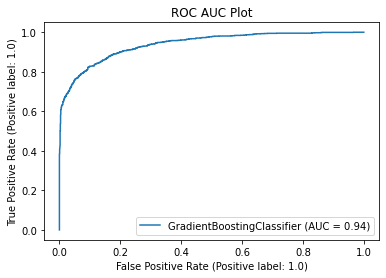

In [89]:
plot_roc_curve(grid_model,x_test,y_test)
plt.title('ROC AUC Plot')

In [90]:
# ROC AUC curve is 94% acheived

## saving the model

In [91]:
filename = 'Customer Churn Prediction'
pickle.dump(grid_model,open(filename,'wb'))

In [92]:
saved_mod = pickle.load(open(filename,'rb'))

In [93]:
saved_mod.predict(x_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [94]:
y_test

4036    0.0
8771    1.0
2008    1.0
6620    1.0
657     0.0
       ... 
5625    0.0
4318    0.0
9992    1.0
7321    1.0
1081    0.0
Name: Churn, Length: 2587, dtype: float64

In [95]:
#prediction is almost close to the actual

In [96]:
#End of Project